In [93]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

# Question 1

In [2]:
# data input format
# type: list = s
    # [sublist, num_groups, length_study]
    # sublist =
        # [subsublist, num_participants]
        # subsublist =
            # [time_event, participant_id (censored/death), 0/1]

In [199]:
def calc_EM(data, num_groups, length_study, statistic):
    plt.figure()
    allinfo_times = []
    allinfo_probs = []
    sum_events = [0]*num_groups
    medians = []
    alives = []
    diction = {}
    for i in range(num_groups):
        flag = False
        d = {}
        backout = {}
        alive = {}
        for entry in data[i][0]:
            if entry[1] == 0:
                if entry[0] not in d:
                    d[entry[0]] = 1
                    sum_events[i] += 1
                else:
                    d[entry[0]] += 1
                    sum_events[i] += 1
                    
                if entry[0] not in diction:
                    diction[entry[0]] = 1
                else:
                    diction[entry[0]] += 1
                    
            elif entry[1] == 1:
                if entry[0] not in backout:
                    backout[entry[0]] = 1
                else:
                    backout[entry[0]] += 1
        
        num_alive = data[i][1]
        probs = []
        times = []
        prob = 1
        probs.append(1)
        times.append(0)
        
        for time in range(0, length_study[i]+1):
            alive[time] = num_alive
            if time in d:
                times.append(time)
                val = (num_alive - d[time])/num_alive
                num_alive = num_alive - d[time]
                probs.append(prob * val)
                prob = prob * val
                if prob <= 0.5 and flag == False:
                    medians.append(prob)
                    flag = True
            if time in backout:
                if time not in d:
                    times.append(time)
                    probs.append(probs[-1])
                    num_alive = num_alive - backout[time]
                else:
                    num_alive = num_alive - backout[time]
                    
        if not flag:
            medians.append(-1)

        plt.step(times, probs, where="pre")
        print(probs)
        allinfo_times.append(times)
        allinfo_probs.append(probs)
        alives.append(alive)
        plt.xlabel("Time")
        plt.ylabel("Probability of Survival")
        
    uniontimes = []
    allinfo_alive = []
    for key in diction:
        uniontimes.append(key)

    for gid in range(num_groups):
        array = []
        for time in uniontimes:
            if time not in alives[gid]:
                array.append(0)
            else:
                array.append(alives[gid][time])
        allinfo_alive.append(array)
    
    sum_alive = []
    for  time in range(len(uniontimes)):
        sum = 0
        for array in allinfo_alive:
            sum += array[time]
        sum_alive.append(sum)
        
    ot = []
    for time in uniontimes:
        ot.append(diction[time])
    
    #uniontimes, allinfo_alive..., sum_alive, ot
    sum_alive = np.array(sum_alive)
    ot = np.array(ot)
    allinfo_alive = np.array(allinfo_alive)
    
    expected = []
    for g in range(num_groups):
        col = allinfo_alive[g] * ot / sum_alive
        res = np.sum(col)
        expected.append(res)
    
    sum_events = np.array(sum_events)
    expected = np.array(expected)
    temp = (sum_events - expected) * (sum_events - expected) / expected
    chisq = np.sum(temp)
    print("CHI SQUARED VALUE:", chisq)
    if chisq > statistic:
        print("HYPOTHESIS REJECTED, survival curves are significantly different")
    else:
        print("Survival curves are similar")

[1, 0.9, 0.7875, 0.6749999999999999, 0.6749999999999999, 0.5399999999999999, 0.4049999999999999, 0.2699999999999999, 0.2699999999999999, 0.2699999999999999]
[1, 1, 0.875, 0.75, 0.75, 0.6000000000000001, 0.6000000000000001, 0.6000000000000001]
CHI SQUARED VALUE: 6.148087536256205
HYPOTHESIS REJECTED, survival curves are significantly different
[[334.8    0.    54.  ]
 [  0.   217.44  36.  ]
 [  0.     0.     1.  ]]
[[ 0.01893939  0.          0.04545455]
 [ 0.          1.24533001 -0.29078456]
 [ 0.          0.          1.        ]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[334.8    0.    54.  ]
 [  0.   217.44  36.  ]
 [  0.     0.     1.  ]]
[[334.8     0.     44.075]
 [  0.    217.44   38.2  ]
 [  0.      0.      1.   ]]


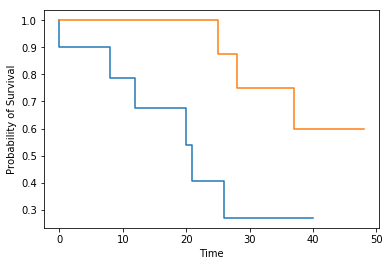

In [200]:
# calc_EM([[[[1,0],[5,0],[6,1],[7,1],[8,1]], 10], [[[1,0],[5,0],[6,0],[7,0],[8,0]], 15]], 2, [10,10])
calc_EM([[[[8,0],[8,1],[12,0],[14,0],[20,1],[21,0],[26,0],[27,0],[32,1],[40,1]], 10], [[[25,1],[25,1],[28,0],[33,0],[37,1],[41,0],[43,1],[48,1],[48,1],[48,1]], 10]], 2, [40, 48], 3.84)

# Question 2

In [201]:
# Assuming prob 0.1 of a person being censored at every time instant

In [202]:
init_alive_1 = 100
init_alive_2 = 100

In [203]:
num_deaths_1 = 50
num_deaths_2 = 50

betas = [0.005, 0.008, 0.01, 0.03, 0.05]
death_times_1 = []
for death in range(num_deaths_1):
    ind = np.random.randint(5)
    x = np.random.geometric(betas[ind])
    death_times_1.append(x)

death_times_2 = []
for death in range(num_deaths_2):
    ind = np.random.randint(5)
    x = np.random.geometric(betas[ind])
    death_times_2.append(x)

In [204]:
death_times_1.sort()
death_times_2.sort()

d_1 = {}
d_2 = {}

max = -1

for i in death_times_1:
    if i > max:
        max = i
    if i not in d_1:
        d_1[i] = 1
    else:
        d_1[i] += 1

for i in death_times_2:
    if i > max:
        max = i
    if i not in d_2:
        d_2[i] = 1
    else:
        d_2[i] += 1

In [205]:
duration = max

In [206]:
num_alive_1 = 100
num_alive_2 = 100

instant = []
g1alive = [100]
g1dies = []
g1cens = []
g2alive = [100]
g2dies = []
g2cens = []

for time in range(duration):
    instant.append(time)
    
    cnt_1 = 0
    cnt_2 = 0
    
    if time in d_1:
        if num_alive_1 - d_1[time] >= 0:
            num_alive_1 -= d_1[time]
    if time in d_2:
        if num_alive_2 - d_2[time] >= 0:
            num_alive_2 -= d_2[time]
    
    # Allow censoring
    for one in range(num_alive_1):
        prob = np.random.uniform()
        if prob < 0.1:
            cnt_1 += 1
            if num_alive_1 - 1 >= 0:
                num_alive_1 -= 1
    
    for two in range(num_alive_2):
        prob = np.random.uniform()
        if prob < 0.1:
            cnt_2 += 1
            if num_alive_2 - 1 >= 0:
                num_alive_2 -= 1
    

    g1alive.append(num_alive_1)
    g2alive.append(num_alive_2)
    if time not in d_1:
        g1dies.append(0)
        written_1 = 0
    else:
        g1dies.append(d_1[time])
        written_1 = d_1[time]
    
    if time not in d_2:
        g2dies.append(0)
        written_2 = 0
    else:
        g2dies.append(d_2[time])
        written_2 = d_2[time]
        
    g1cens.append(cnt_1)
    g2cens.append(cnt_2)
    if num_alive_1 + num_alive_2 + cnt_1 + cnt_2 + written_1 + written_2 == 0:
        break
    
data = np.array([instant, g1alive[:-1], g1dies, g1cens, g2alive[:-1], g2dies, g2cens])

In [207]:
chart = pd.DataFrame(data.transpose(), columns = ['Time', 'Group 1 Alive', "Group 1 Died", "Group 1 Censored", "Group 2 Alive", "Group 2 Died", "Group 2 Censored"])

In [208]:
chart

,Time,Group 1 Alive,Group 1 Died,Group 1 Censored,Group 2 Alive,Group 2 Died,Group 2 Censored
0,0,100,0,8,100,0,10
1,1,92,1,9,90,3,12
2,2,82,1,11,75,1,10
3,3,70,0,8,64,2,8
4,4,62,1,9,54,0,5
5,5,52,1,2,49,0,5
6,6,49,2,1,44,3,4
7,7,46,1,7,37,0,5
8,8,38,0,6,32,1,3
9,9,32,1,5,28,0,2


In [209]:
timecol = chart["Time"]
g1d = chart["Group 1 Died"]
g1c = chart["Group 1 Censored"]
g2d = chart["Group 2 Died"]
g2c = chart["Group 2 Censored"]

grp1 = []
grp2 = []
for q in range(len(timecol)):
    for cc in range(g1d[q]):
        grp1.append([timecol[q],1])
    for dd in range(g2d[q]):
        grp2.append([timecol[q],1])
    for ee in range(g1c[q]):
        grp1.append([timecol[q],0])
    for ff in range(g2c[q]):
        grp2.append([timecol[q],0])

[1, 0.92, 0.8300000000000001, 0.7186585365853659, 0.6365261324041812, 0.5441271777003485, 0.5231992093272582, 0.5125216744430284, 0.43452924572343715, 0.3659193648197365, 0.3087444640666527, 0.2849948899076794, 0.26124531574870613, 0.2239245563560338, 0.18660379696336152, 0.17327495432312143, 0.12995621574234106, 0.11371168877454843, 0.0974671618067558, 0.0974671618067558, 0.0974671618067558, 0.0974671618067558, 0.0487335809033779, 0.0487335809033779, 0.0487335809033779, 0.0487335809033779]
[1, 0.9, 0.78, 0.676, 0.5915, 0.5367314814814815, 0.481962962962963, 0.4381481481481482, 0.378938938938939, 0.34341341341341347, 0.31888388388388395, 0.3066191191191192, 0.2810675258591926, 0.2810675258591926, 0.2676833579611358, 0.2535947601737076, 0.23950616238627936, 0.21132896681142296, 0.16604418820897518, 0.13585433580734332, 0.10566448340571148, 0.09056955720489555, 0.07245564576391644, 0.07245564576391644, 0.07245564576391644]
CHI SQUARED VALUE: 0.05091969665178027
Survival curves are simila

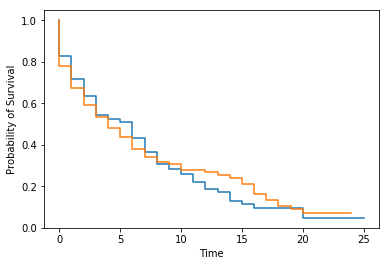

In [210]:
calc_EM([[grp1, 100], [grp2, 100]], 2, [time, time], 3.84)